## Estudo sobre a Atenção Primária de Santa Catarina, com o dataset retirado do site Base dos Dados, no periodo de 2007 a 2020.



### Importando bibliotecas:

In [2]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np


### Fazendo download do dataset:

In [3]:
import basedosdados as bd

# Para carregar o dado direto no pandas
df = bd.read_table(dataset_id='br_ms_atencao_basica',
                   table_id='municipio',
                   # Conexão com o googleCloud
                   billing_project_id="atencao-primaria-417817")
df.head(5)

Downloading: 100%|██████████| 901944/901944 [01:48<00:00, 8333.28rows/s]


,ano,mes,sigla_uf,id_municipio,id_municipio_6,populacao,carga_horaria_medica_atencao_basica_tradicional,carga_horaria_enfermagem_atencao_basica_tradicional,quantidade_equipes_atencao_basica_equivalente,quantidade_equipes_atencao_basica_parametrizada,quantidade_equipes_saude_familia,quantidade_equipes_atencao_basica_total,populacao_coberta_estrategia_saude_familia,proporcao_cobertura_estrategia_saude_familia,populacao_coberta_total_atencao_basica,proporcao_cobertura_total_atencao_basica
0,2007,7,AC,1200401,120040,314127,0.00,0.00,0,0,38,38,131100,41.73,131100,41.73
1,2007,8,AC,1200401,120040,314127,23.40,30.90,23,0,40,63,138000,43.93,208200,66.28
2,2007,9,AC,1200401,120040,314127,22.60,29.40,23,0,40,63,138000,43.93,205800,65.51
3,2007,10,AC,1200401,120040,314127,21.93,29.90,22,0,40,62,138000,43.93,203790,64.88
4,2007,11,AC,1200401,120040,314127,22.70,34.65,23,0,40,63,138000,43.93,206100,65.61


In [4]:
# Para listar as tabelas do dataset
df.columns

Index(['ano', 'mes', 'sigla_uf', 'id_municipio', 'id_municipio_6', 'populacao',
       'carga_horaria_medica_atencao_basica_tradicional',
       'carga_horaria_enfermagem_atencao_basica_tradicional',
       'quantidade_equipes_atencao_basica_equivalente',
       'quantidade_equipes_atencao_basica_parametrizada',
       'quantidade_equipes_saude_familia',
       'quantidade_equipes_atencao_basica_total',
       'populacao_coberta_estrategia_saude_familia',
       'proporcao_cobertura_estrategia_saude_familia',
       'populacao_coberta_total_atencao_basica',
       'proporcao_cobertura_total_atencao_basica'],
      dtype='object')

### Filtrando os dados para Santa Catarina:

In [5]:
# Criando um dataframe somente com o estado de Santa Catarina:
df_sc_2020 = df[(df['sigla_uf'] == 'SC') & (df['ano'] == 2020) & (df['mes'] == 12)]
df_sc_2020["id_municipio"] = df_sc_2020["id_municipio"].astype("int64")
df_sc_2020.head(5)


,ano,mes,sigla_uf,id_municipio,id_municipio_6,populacao,carga_horaria_medica_atencao_basica_tradicional,carga_horaria_enfermagem_atencao_basica_tradicional,quantidade_equipes_atencao_basica_equivalente,quantidade_equipes_atencao_basica_parametrizada,quantidade_equipes_saude_familia,quantidade_equipes_atencao_basica_total,populacao_coberta_estrategia_saude_familia,proporcao_cobertura_estrategia_saude_familia,populacao_coberta_total_atencao_basica,proporcao_cobertura_total_atencao_basica
42981,2020,12,SC,4202008,420200,142295,6.40,18.12,6,3,20,29,69000,48.49,97200,68.31
43003,2020,12,SC,4202404,420240,357199,18.83,32.67,19,1,66,86,227700,63.75,287190,80.40
43015,2020,12,SC,4202909,420290,134723,4.33,5.50,4,0,32,36,110400,81.95,123390,91.59
43030,2020,12,SC,4204202,420420,220367,24.45,16.75,17,0,57,74,196650,89.24,220367,100.00
43042,2020,12,SC,4204608,420460,215186,17.23,19.62,17,0,44,61,151800,70.54,203490,94.56


In [6]:
df_sc_2020.shape
# Obs: faltam 14 municipios no dataframe

(295, 16)

### Adicionando o nome do municipio no df de acordo com cada id:

In [7]:
"""Pegando a lista de municípios de Santa Catarina pelo arquivo RELATORIO_DTB_BRASIL_MUNICIPIO.xls com a id e o nome """

# Pulando 6 linhas do arquivo .xls para chegar no cabeçalho
counties = pd.read_excel('RELATORIO_DTB_BRASIL_MUNICIPIO.xls', skiprows=6)

# Filtrando apenas os municípios de Santa Catarina
counties_sc = counties[counties["Nome_UF"] == "Santa Catarina"]

# Renomeando a coluna "Código Município Completo" para "cod_municipio"
counties_sc = counties_sc.rename(columns={'Código Município Completo': 'cod_municipio'})

# Selecionando apenas as colunas "cod_municipio" e "Nome_Município"
counties_sc = counties_sc.loc[:, ['cod_municipio', 'Nome_Município']]

counties_sc.head(5)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


,cod_municipio,Nome_Município
4311,4200051,Abdon Batista
4312,4200101,Abelardo Luz
4313,4200200,Agrolândia
4314,4200309,Agronômica
4315,4200408,Água Doce


In [8]:
# Criando um dicionário com os códigos dos municípios
dict_counties = dict(zip(counties_sc["cod_municipio"], counties_sc["Nome_Município"]))

# Substitui os códigos pelos nomes no DataFrame df_sc_2020
df_sc_2020["municipio"] = df_sc_2020["id_municipio"].apply(lambda x: dict_counties.get(x, "Município Não Encontrado"))

df_sc_2020.head(10)


,ano,mes,sigla_uf,id_municipio,id_municipio_6,populacao,carga_horaria_medica_atencao_basica_tradicional,carga_horaria_enfermagem_atencao_basica_tradicional,quantidade_equipes_atencao_basica_equivalente,quantidade_equipes_atencao_basica_parametrizada,quantidade_equipes_saude_familia,quantidade_equipes_atencao_basica_total,populacao_coberta_estrategia_saude_familia,proporcao_cobertura_estrategia_saude_familia,populacao_coberta_total_atencao_basica,proporcao_cobertura_total_atencao_basica,municipio
42981,2020,12,SC,4202008,420200,142295,6.40,18.12,6,3,20,29,69000,48.49,97200,68.31,Balneário Camboriú
43003,2020,12,SC,4202404,420240,357199,18.83,32.67,19,1,66,86,227700,63.75,287190,80.40,Blumenau
43015,2020,12,SC,4202909,420290,134723,4.33,5.50,4,0,32,36,110400,81.95,123390,91.59,Brusque
43030,2020,12,SC,4204202,420420,220367,24.45,16.75,17,0,57,74,196650,89.24,220367,100.00,Chapecó
43042,2020,12,SC,4204608,420460,215186,17.23,19.62,17,0,44,61,151800,70.54,203490,94.56,Criciúma
43054,2020,12,SC,4205407,420540,500973,20.06,44.40,20,0,94,114,324300,64.73,384480,76.75,Florianópolis
43075,2020,12,SC,4208203,420820,219536,66.01,43.32,43,0,50,93,172500,78.57,219536,100.00,Itajaí
43086,2020,12,SC,4208906,420890,177697,11.61,16.57,12,3,21,36,72450,40.77,116280,65.44,Jaraguá do Sul
43098,2020,12,SC,4209102,420910,590466,9.36,9.20,9,0,149,158,514050,87.06,541650,91.73,Joinville
43110,2020,12,SC,4209300,420930,157544,16.53,22.00,17,0,44,61,151800,96.35,157544,100.00,Lages


### Criando um mapa de SC com GeoPandas:

In [9]:
# Caminho para o arquivo shapefile que está na pasta LimitesMunic-2013
count_file = 'LimitesMunic-2013/LimitesMunic-2013.shp'

# Lendo os dados e criando um df
coordinates_geo = gpd.read_file(count_file)
coordinates_geo = coordinates_geo.rename(columns={'NOME': 'municipio'})
coordinates_geo


,municipio,Area_km²,geometry
0,Balneário Gaivota,147.967175,"POLYGON ((639461.662 6784701.555, 640001.797 6..."
1,Passo de Torres,96.333031,"POLYGON ((627143.383 6766843.032, 630139.191 6..."
2,São João do Sul,180.408577,"POLYGON ((613538.179 6780392.900, 616073.028 6..."
3,Praia Grande,286.599507,"POLYGON ((603816.582 6782133.281, 603970.122 6..."
4,Santa Rosa do Sul,151.547980,"POLYGON ((622915.697 6783251.638, 623020.887 6..."
...,...,...,...
290,Grão Pará,337.145613,"POLYGON ((668962.670 6874147.680, 668925.924 6..."
291,Orleans,549.307281,"POLYGON ((649910.110 6887914.670, 649972.530 6..."
292,Laguna,330.548382,"MULTIPOLYGON (((721128.833 6864324.586, 721137..."
293,Treze de Maio,162.064027,"POLYGON ((682035.695 6846248.720, 682065.715 6..."


<AxesSubplot: >

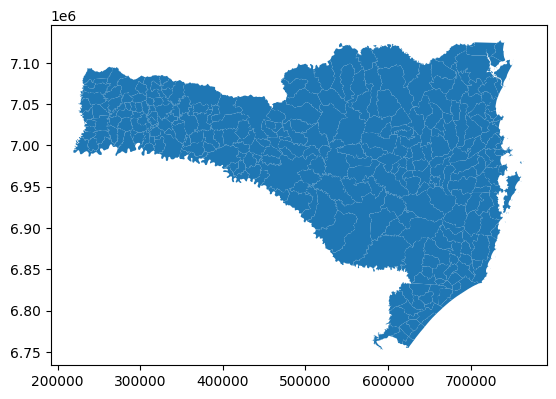

In [10]:
coordinates_geo.plot()


### Adicionando a coluna geometry e Area_km² ao df_sc_2020

In [11]:
# Merge dos dataframes df_sc_2020 e coordinates_geo
df_sc_2020_comp = df_sc_2020.merge(coordinates_geo, on='municipio', how='inner')
df_sc_2020_comp.head(5)

,ano,mes,sigla_uf,id_municipio,id_municipio_6,populacao,carga_horaria_medica_atencao_basica_tradicional,carga_horaria_enfermagem_atencao_basica_tradicional,quantidade_equipes_atencao_basica_equivalente,quantidade_equipes_atencao_basica_parametrizada,quantidade_equipes_saude_familia,quantidade_equipes_atencao_basica_total,populacao_coberta_estrategia_saude_familia,proporcao_cobertura_estrategia_saude_familia,populacao_coberta_total_atencao_basica,proporcao_cobertura_total_atencao_basica,municipio,Area_km²,geometry
0,2020,12,SC,4202404,420240,357199,18.83,32.67,19,1,66,86,227700,63.75,287190,80.40,Blumenau,519.903307,"POLYGON ((687716.497 7054839.816, 687763.437 7..."
1,2020,12,SC,4202909,420290,134723,4.33,5.50,4,0,32,36,110400,81.95,123390,91.59,Brusque,282.963212,"POLYGON ((710447.117 7011967.318, 710473.207 7..."
2,2020,12,SC,4204202,420420,220367,24.45,16.75,17,0,57,74,196650,89.24,220367,100.00,Chapecó,623.830143,"POLYGON ((325754.886 7019184.538, 325792.486 7..."
3,2020,12,SC,4204608,420460,215186,17.23,19.62,17,0,44,61,151800,70.54,203490,94.56,Criciúma,236.122324,"POLYGON ((651309.969 6831573.680, 656019.457 6..."
4,2020,12,SC,4205407,420540,500973,20.06,44.40,20,0,94,114,324300,64.73,384480,76.75,Florianópolis,437.581737,"MULTIPOLYGON (((738715.600 6925450.402, 738720..."


### Criando o mapa de Santa Catarina por proporção de cobertura na atenção primária

In [12]:
# Normaliza a coluna "proporcao_cobertura_total_atencao_basica" entre 0 e 1
df_sc_2020_comp["proporcao_cobertura_normalizada"] = df_sc_2020_comp["proporcao_cobertura_total_atencao_basica"] / 100
df_sc_2020_comp["proporcao_cobertura_normalizada"] = df_sc_2020_comp["proporcao_cobertura_normalizada"].fillna(np.nan)
df_sc_2020_comp.head(20)

,ano,mes,sigla_uf,id_municipio,id_municipio_6,populacao,carga_horaria_medica_atencao_basica_tradicional,carga_horaria_enfermagem_atencao_basica_tradicional,quantidade_equipes_atencao_basica_equivalente,quantidade_equipes_atencao_basica_parametrizada,quantidade_equipes_saude_familia,quantidade_equipes_atencao_basica_total,populacao_coberta_estrategia_saude_familia,proporcao_cobertura_estrategia_saude_familia,populacao_coberta_total_atencao_basica,proporcao_cobertura_total_atencao_basica,municipio,Area_km²,geometry,proporcao_cobertura_normalizada
0,2020,12,SC,4202404,420240,357199,18.83,32.67,19,1,66,86,227700,63.75,287190,80.40,Blumenau,519.903307,"POLYGON ((687716.497 7054839.816, 687763.437 7...",0.8040
1,2020,12,SC,4202909,420290,134723,4.33,5.50,4,0,32,36,110400,81.95,123390,91.59,Brusque,282.963212,"POLYGON ((710447.117 7011967.318, 710473.207 7...",0.9159
2,2020,12,SC,4204202,420420,220367,24.45,16.75,17,0,57,74,196650,89.24,220367,100.00,Chapecó,623.830143,"POLYGON ((325754.886 7019184.538, 325792.486 7...",1.0000
3,2020,12,SC,4204608,420460,215186,17.23,19.62,17,0,44,61,151800,70.54,203490,94.56,Criciúma,236.122324,"POLYGON ((651309.969 6831573.680, 656019.457 6...",0.9456
4,2020,12,SC,4205407,420540,500973,20.06,44.40,20,0,94,114,324300,64.73,384480,76.75,Florianópolis,437.581737,"MULTIPOLYGON (((738715.600 6925450.402, 738720...",0.7675
5,2020,12,SC,4208203,420820,219536,66.01,43.32,43,0,50,93,172500,78.57,219536,100.00,Itajaí,288.644592,"POLYGON ((725786.032 7029518.984, 725895.432 7...",1.0000
6,2020,12,SC,4208906,420890,177697,11.61,16.57,12,3,21,36,72450,40.77,116280,65.44,Jaraguá do Sul,530.035261,"POLYGON ((681298.427 7098986.783, 681320.887 7...",0.6544
7,2020,12,SC,4209102,420910,590466,9.36,9.20,9,0,149,158,514050,87.06,541650,91.73,Joinville,1103.280234,"MULTIPOLYGON (((725618.391 7089953.790, 725648...",0.9173
8,2020,12,SC,4209300,420930,157544,16.53,22.00,17,0,44,61,151800,96.35,157544,100.00,Lages,2630.581727,"POLYGON ((597026.356 6948527.313, 596951.336 6...",1.0000
9,2020,12,SC,4211900,421190,171797,4.83,6.87,5,0,34,39,117300,68.28,131790,76.71,Palhoça,326.642058,"MULTIPOLYGON (((734173.972 6930585.093, 734178...",0.7671


In [13]:
df_com_nans = df_sc_2020_comp.loc[df_sc_2020_comp["proporcao_cobertura_normalizada"] == 0.0, :]

df_com_nans

,ano,mes,sigla_uf,id_municipio,id_municipio_6,populacao,carga_horaria_medica_atencao_basica_tradicional,carga_horaria_enfermagem_atencao_basica_tradicional,quantidade_equipes_atencao_basica_equivalente,quantidade_equipes_atencao_basica_parametrizada,quantidade_equipes_saude_familia,quantidade_equipes_atencao_basica_total,populacao_coberta_estrategia_saude_familia,proporcao_cobertura_estrategia_saude_familia,populacao_coberta_total_atencao_basica,proporcao_cobertura_total_atencao_basica,municipio,Area_km²,geometry,proporcao_cobertura_normalizada
13,2020,12,SC,4202578,420257,2142,0.00,0.0,0,0,0,0,0,0.0,0,0.0,Bom Jesus do Oeste,67.700209,"POLYGON ((290914.136 7053218.851, 291004.546 7...",0.0
14,2020,12,SC,4203253,420325,2525,0.73,0.0,0,0,0,0,0,0.0,0,0.0,Capão Alto,1333.563500,"POLYGON ((538985.958 6921170.220, 539154.388 6...",0.0
15,2020,12,SC,4204459,420445,2549,0.00,0.0,0,0,0,0,0,0.0,0,0.0,Coronel Martins,107.265724,"POLYGON ((335645.586 7068942.623, 335585.366 7...",0.0
16,2020,12,SC,4205605,420560,2873,0.00,1.0,0,0,0,0,0,0.0,0,0.0,Galvão,139.290103,"POLYGON ((336002.633 7081038.495, 336116.513 7...",0.0
17,2020,12,SC,4206801,420680,3202,0.00,0.0,0,0,0,0,0,0.0,0,0.0,Ibicaré,155.600540,"POLYGON ((467745.501 7011407.987, 467835.011 7...",0.0
18,2020,12,SC,4210555,421055,1797,1.23,0.0,0,0,0,0,0,0.0,0,0.0,Marema,103.111118,"POLYGON ((335455.202 7039918.041, 335542.712 7...",0.0
19,2020,12,SC,4210852,421085,2309,0.00,0.0,0,0,0,0,0,0.0,0,0.0,Mirim Doce,339.030232,"POLYGON ((567640.443 7005095.905, 567673.203 7...",0.0
20,2020,12,SC,4211652,421165,2442,0.00,0.0,0,0,0,0,0,0.0,0,0.0,Novo Horizonte,151.449098,"POLYGON ((315661.491 7078240.470, 315809.381 7...",0.0
21,2020,12,SC,4211850,421185,2217,0.00,0.0,0,0,0,0,0,0.0,0,0.0,Ouro Verde,188.949825,"POLYGON ((374206.273 7050105.419, 375185.023 7...",0.0
23,2020,12,SC,4214300,421430,2878,0.33,0.0,0,0,0,0,0,0.0,0,0.0,Rancho Queimado,288.282468,"POLYGON ((683730.820 6947755.496, 683736.500 6...",0.0


In [14]:
soma = df_sc_2020_comp["proporcao_cobertura_normalizada"].eq(0.00000).sum()
soma

12

Text(0.5, 1.0, 'Proporção de cobertura da atenção básica em Santa Catarina')

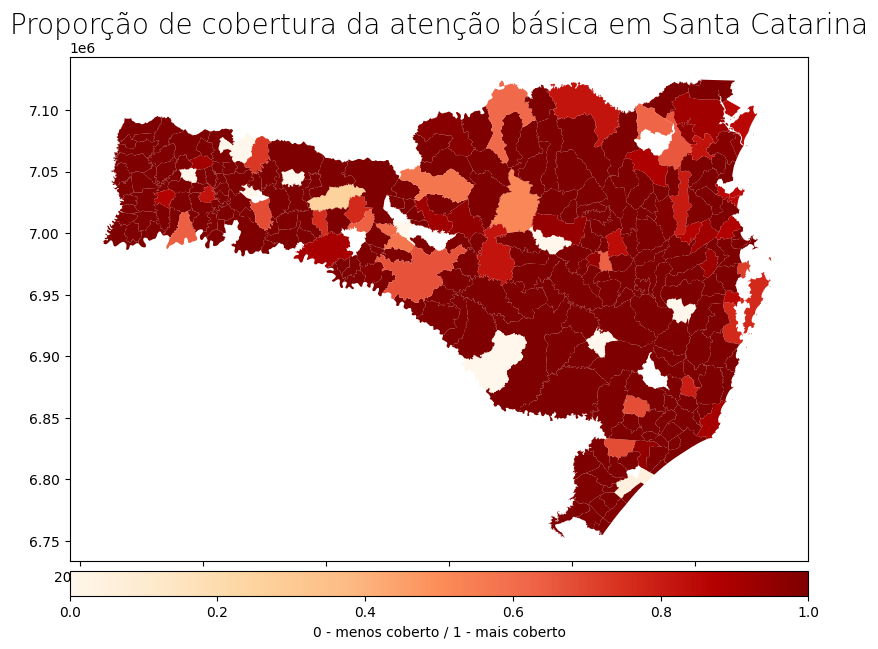

In [15]:
"""Criando um mapa com diferença de opacidade para visualizar a cobertura da atenção básica em SC"""

# Cria a figura e o eixo
fig, ax = plt.subplots(figsize=(15, 7))

# Plota o mapa
map_sc = gpd.GeoDataFrame(df_sc_2020_comp, geometry=df_sc_2020_comp["geometry"])

# Adiciona a barra de cores
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

# Adiciona valores nulos para 14 municípios
#map_sc.loc[np.random.choice(map_sc.index, 14), 'proporcao_cobertura_normalizada'] = np.nan

# Plota o mapa com a coluna "proporcao_cobertura_normalizada" colorida
map_sc.plot(column='proporcao_cobertura_normalizada',
            cax=cax,
            legend=True,
            cmap='OrRd',
            ax=ax,
            legend_kwds={'label': "0 - menos coberto / 1 - mais coberto", 'orientation': "horizontal"},
            missing_kwds={
                "color": "lightgrey",
                "edgecolor": "red",
                "hatch": "///",
                "label": "Missing values",
    })

# Adiciona o título
ax.set_title('Proporção de cobertura da atenção básica em Santa Catarina', fontdict={'fontsize': '20', 'fontweight': '3'})




In [25]:
df_imarui = df_sc_2020_comp.loc[df_sc_2020_comp["municipio"] == "Imaruí", :]
df_imarui

,ano,mes,sigla_uf,id_municipio,id_municipio_6,populacao,carga_horaria_medica_atencao_basica_tradicional,carga_horaria_enfermagem_atencao_basica_tradicional,quantidade_equipes_atencao_basica_equivalente,quantidade_equipes_atencao_basica_parametrizada,...,quantidade_equipes_atencao_basica_total,populacao_coberta_estrategia_saude_familia,proporcao_cobertura_estrategia_saude_familia,populacao_coberta_total_atencao_basica,proporcao_cobertura_total_atencao_basica,municipio,Area_km²,geometry,proporcao_cobertura_normalizada,prop_cobertura_normalizada_familia
210,2020,12,SC,4207205,420720,10135,3.16,1.5,2,0,...,7,10135,100.0,10135,100.0,Imaruí,542.712126,"POLYGON ((713073.773 6892903.544, 713106.923 6...",1.0,1.0


### Criando mapa de SC pela proporção de cobertura de estratégia de saúde da família


In [23]:
# Normaliza a coluna "proporcao_cobertura_total_atencao_basica" entre 0 e 1
df_sc_2020_comp["prop_cobertura_normalizada_familia"] = df_sc_2020_comp["proporcao_cobertura_estrategia_saude_familia"] / 100
df_sc_2020_comp["prop_cobertura_normalizada_familia"] = df_sc_2020_comp["proporcao_cobertura_normalizada"].fillna(np.nan)
df_sc_2020_comp.head(10)

,ano,mes,sigla_uf,id_municipio,id_municipio_6,populacao,carga_horaria_medica_atencao_basica_tradicional,carga_horaria_enfermagem_atencao_basica_tradicional,quantidade_equipes_atencao_basica_equivalente,quantidade_equipes_atencao_basica_parametrizada,...,quantidade_equipes_atencao_basica_total,populacao_coberta_estrategia_saude_familia,proporcao_cobertura_estrategia_saude_familia,populacao_coberta_total_atencao_basica,proporcao_cobertura_total_atencao_basica,municipio,Area_km²,geometry,proporcao_cobertura_normalizada,prop_cobertura_normalizada_familia
0,2020,12,SC,4202404,420240,357199,18.83,32.67,19,1,...,86,227700,63.75,287190,80.40,Blumenau,519.903307,"POLYGON ((687716.497 7054839.816, 687763.437 7...",0.6375,0.6375
1,2020,12,SC,4202909,420290,134723,4.33,5.50,4,0,...,36,110400,81.95,123390,91.59,Brusque,282.963212,"POLYGON ((710447.117 7011967.318, 710473.207 7...",0.8195,0.8195
2,2020,12,SC,4204202,420420,220367,24.45,16.75,17,0,...,74,196650,89.24,220367,100.00,Chapecó,623.830143,"POLYGON ((325754.886 7019184.538, 325792.486 7...",0.8924,0.8924
3,2020,12,SC,4204608,420460,215186,17.23,19.62,17,0,...,61,151800,70.54,203490,94.56,Criciúma,236.122324,"POLYGON ((651309.969 6831573.680, 656019.457 6...",0.7054,0.7054
4,2020,12,SC,4205407,420540,500973,20.06,44.40,20,0,...,114,324300,64.73,384480,76.75,Florianópolis,437.581737,"MULTIPOLYGON (((738715.600 6925450.402, 738720...",0.6473,0.6473
5,2020,12,SC,4208203,420820,219536,66.01,43.32,43,0,...,93,172500,78.57,219536,100.00,Itajaí,288.644592,"POLYGON ((725786.032 7029518.984, 725895.432 7...",0.7857,0.7857
6,2020,12,SC,4208906,420890,177697,11.61,16.57,12,3,...,36,72450,40.77,116280,65.44,Jaraguá do Sul,530.035261,"POLYGON ((681298.427 7098986.783, 681320.887 7...",0.4077,0.4077
7,2020,12,SC,4209102,420910,590466,9.36,9.20,9,0,...,158,514050,87.06,541650,91.73,Joinville,1103.280234,"MULTIPOLYGON (((725618.391 7089953.790, 725648...",0.8706,0.8706
8,2020,12,SC,4209300,420930,157544,16.53,22.00,17,0,...,61,151800,96.35,157544,100.00,Lages,2630.581727,"POLYGON ((597026.356 6948527.313, 596951.336 6...",0.9635,0.9635
9,2020,12,SC,4211900,421190,171797,4.83,6.87,5,0,...,39,117300,68.28,131790,76.71,Palhoça,326.642058,"MULTIPOLYGON (((734173.972 6930585.093, 734178...",0.6828,0.6828


Text(0.5, 1.0, 'Proporção de cobertura da estratégia de saúde da família')

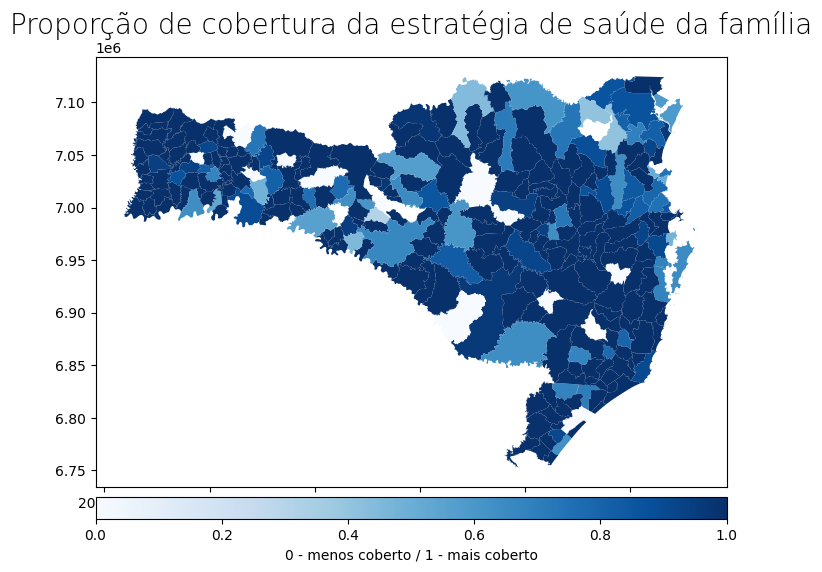

In [33]:
"""Criando um mapa com diferença de opacidade para visualizar a cobertura da estratégia de saúde da família em SC"""

# Cria a figura e o eixo
fig, ax = plt.subplots(figsize=(15, 6))

# Plota o mapa
map_sc = gpd.GeoDataFrame(df_sc_2020_comp, geometry=df_sc_2020_comp["geometry"])

# Adiciona a barra de cores
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

# Adiciona valores nulos para 14 municípios
#map_sc.loc[np.random.choice(map_sc.index, 14), 'proporcao_cobertura_normalizada'] = np.nan

# Plota o mapa com a coluna "proporcao_cobertura_normalizada" colorida
map_sc.plot(column='prop_cobertura_normalizada_familia',
            cax=cax,
            legend=True,
            cmap='Blues',
            ax=ax,
            legend_kwds={'label': "0 - menos coberto / 1 - mais coberto", 'orientation': "horizontal"},
            missing_kwds={
                "color": "lightgrey",
                "edgecolor": "red",
                "hatch": "///",
                "label": "Missing values",
    })

# Adiciona o título
ax.set_title('Proporção de cobertura da estratégia de saúde da família', fontdict={'fontsize': '20', 'fontweight': '3'})

In [29]:
df_sc_2020_comp['quantidade_equipes_atencao_basica_equivalente'] = df_sc_2020_comp['quantidade_equipes_atencao_basica_equivalente'].astype(float)


### Mapa de SC por número de equipes

In [39]:
valor_maximo = df_sc_2020_comp['quantidade_equipes_atencao_basica_equivalente'].max()
valor_mini = df_sc_2020_comp['quantidade_equipes_atencao_basica_equivalente'].min()
print(valor_maximo)
print(valor_mini)

43.0
0.0


In [40]:
df_sc_2020_comp["norm_equipes"] = df_sc_2020_comp["quantidade_equipes_atencao_basica_equivalente"] / 43
df_sc_2020_comp.head(10)

,ano,mes,sigla_uf,id_municipio,id_municipio_6,populacao,carga_horaria_medica_atencao_basica_tradicional,carga_horaria_enfermagem_atencao_basica_tradicional,quantidade_equipes_atencao_basica_equivalente,quantidade_equipes_atencao_basica_parametrizada,...,populacao_coberta_estrategia_saude_familia,proporcao_cobertura_estrategia_saude_familia,populacao_coberta_total_atencao_basica,proporcao_cobertura_total_atencao_basica,municipio,Area_km²,geometry,proporcao_cobertura_normalizada,prop_cobertura_normalizada_familia,norm_equipes
0,2020,12,SC,4202404,420240,357199,18.83,32.67,19.0,1,...,227700,63.75,287190,80.40,Blumenau,519.903307,"POLYGON ((687716.497 7054839.816, 687763.437 7...",0.6375,0.6375,0.441860
1,2020,12,SC,4202909,420290,134723,4.33,5.50,4.0,0,...,110400,81.95,123390,91.59,Brusque,282.963212,"POLYGON ((710447.117 7011967.318, 710473.207 7...",0.8195,0.8195,0.093023
2,2020,12,SC,4204202,420420,220367,24.45,16.75,17.0,0,...,196650,89.24,220367,100.00,Chapecó,623.830143,"POLYGON ((325754.886 7019184.538, 325792.486 7...",0.8924,0.8924,0.395349
3,2020,12,SC,4204608,420460,215186,17.23,19.62,17.0,0,...,151800,70.54,203490,94.56,Criciúma,236.122324,"POLYGON ((651309.969 6831573.680, 656019.457 6...",0.7054,0.7054,0.395349
4,2020,12,SC,4205407,420540,500973,20.06,44.40,20.0,0,...,324300,64.73,384480,76.75,Florianópolis,437.581737,"MULTIPOLYGON (((738715.600 6925450.402, 738720...",0.6473,0.6473,0.465116
5,2020,12,SC,4208203,420820,219536,66.01,43.32,43.0,0,...,172500,78.57,219536,100.00,Itajaí,288.644592,"POLYGON ((725786.032 7029518.984, 725895.432 7...",0.7857,0.7857,1.000000
6,2020,12,SC,4208906,420890,177697,11.61,16.57,12.0,3,...,72450,40.77,116280,65.44,Jaraguá do Sul,530.035261,"POLYGON ((681298.427 7098986.783, 681320.887 7...",0.4077,0.4077,0.279070
7,2020,12,SC,4209102,420910,590466,9.36,9.20,9.0,0,...,514050,87.06,541650,91.73,Joinville,1103.280234,"MULTIPOLYGON (((725618.391 7089953.790, 725648...",0.8706,0.8706,0.209302
8,2020,12,SC,4209300,420930,157544,16.53,22.00,17.0,0,...,151800,96.35,157544,100.00,Lages,2630.581727,"POLYGON ((597026.356 6948527.313, 596951.336 6...",0.9635,0.9635,0.395349
9,2020,12,SC,4211900,421190,171797,4.83,6.87,5.0,0,...,117300,68.28,131790,76.71,Palhoça,326.642058,"MULTIPOLYGON (((734173.972 6930585.093, 734178...",0.6828,0.6828,0.116279


Text(0.5, 1.0, 'Proporção do número de equipes de saúde em relação a cobertura')

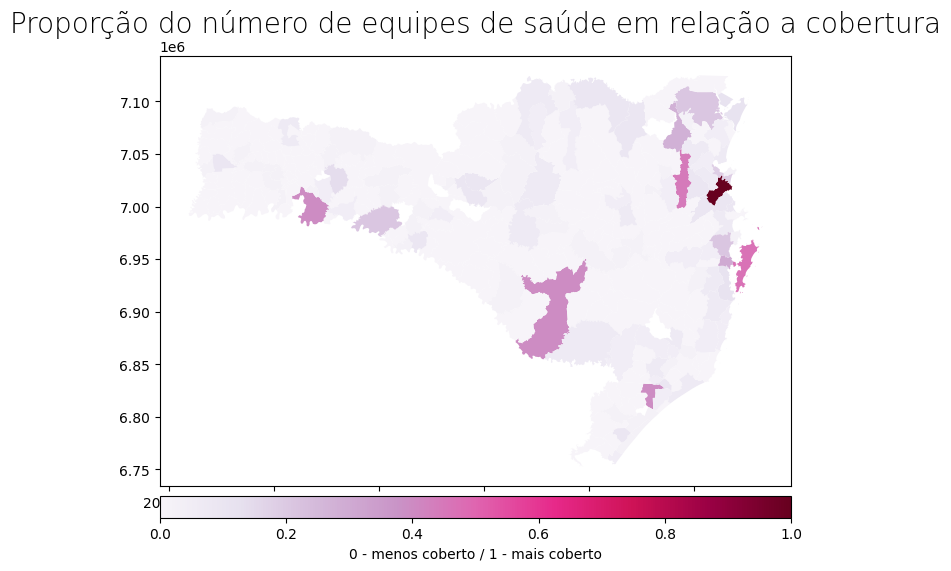

In [44]:
"""Criando um mapa com diferença de opacidade para visualizar a cobertura da estratégia de saúde da família em SC"""

# Cria a figura e o eixo
fig, ax = plt.subplots(figsize=(15, 6))

# Plota o mapa
map_sc = gpd.GeoDataFrame(df_sc_2020_comp, geometry=df_sc_2020_comp["geometry"])

# Adiciona a barra de cores
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

# Adiciona valores nulos para 14 municípios
#map_sc.loc[np.random.choice(map_sc.index, 14), 'proporcao_cobertura_normalizada'] = np.nan

# Plota o mapa com a coluna "proporcao_cobertura_normalizada" colorida
map_sc.plot(column='norm_equipes',
            cax=cax,
            legend=True,
            cmap='PuRd',
            ax=ax,
            legend_kwds={'label': "0 - menos coberto / 1 - mais coberto", 'orientation': "horizontal"},
            missing_kwds={
                "color": "lightgrey",
                "edgecolor": "red",
                "hatch": "///",
                "label": "Missing values",
    })

# Adiciona o título
ax.set_title('Proporção do número de equipes de saúde em relação a cobertura', fontdict={'fontsize': '20', 'fontweight': '3'})